# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19041943,
            "id": 1,
            "last_updated": 1652752747,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 569804748958,
                    "percent_change_1h": -0.598355051109877,
                    "percent_change_24h": -2.46634389748137,
                    "percent_change_7d": -0.844059663029715,
                    "percentage_change_1h": -0.598355051109877,
                    "percentage_change_24h": -2.46634389748137,
                    "percentage_change_7d": -0.844059663029715,
                    "price": 30014.0,
                    "volume_24h": 28383173590
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19041943,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocur

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120808200,
            "id": 1027,
            "last_updated": 1652752719,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 245902808725,
                    "percent_change_1h": -0.608013867419675,
                    "percent_change_24h": -2.75485799776729,
                    "percent_change_7d": -9.36895455823222,
                    "percentage_change_1h": -0.608013867419675,
                    "percentage_change_24h": -2.75485799776729,
                    "percentage_change_7d": -9.36895455823222,
                    "price": 2039.1,
                    "volume_24h": 20006442358
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120808200,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocur

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f'The current price of 1 BTC in USD is ${btc_price:.2f}.')


The current price of 1 BTC in USD is $30014.00.


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f'The current price of 1 ETH in USD is ${eth_price:.2f}.')


The current price of 1 ETH in USD is $2039.10.


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f'You have {btc_coins} and at a current price of ${btc_price:.2f}, your current BTC portfolio is equal to ${btc_value:.2f}.')


You have 1.2 and at a current price of $30014.00, your current BTC portfolio is equal to $36016.80.


In [11]:
# Compute the current value of the ETH holding 
eth_value =eth_coins * eth_price
# Print current value of your holding in ETH
print(f'You have {eth_coins} and at a current price of ${eth_price:.2f}, your current ETH portfolio is equal to ${eth_value:.2f}.')

You have 5.3 and at a current price of $2039.10, your current ETH portfolio is equal to $10807.23.


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'Your total cryptocurrency wallet balance is ${total_crypto_wallet:.2f}.')


Your total cryptocurrency wallet balance is $46824.03.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

print(type(alpaca_api_key),type(alpaca_secret_key))

<class 'str'> <class 'str'>


In [15]:
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2020-05-13',tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-05-13', tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

prices_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-05-13 04:00:00+00:00,116.63,116.76,116.450,116.6,4425927,16375,116.647726,AGG
2020-05-13 04:00:00+00:00,285.95,287.19,278.965,281.6,144809899,833463,282.592780,SPY


In [20]:
# Reorganize the DataFrame
# Separate ticker data
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol',axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)

display(AGG,SPY)

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-05-13 04:00:00+00:00,116.63,116.76,116.45,116.6,4425927,16375,116.647726


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-05-13 04:00:00+00:00,285.95,287.19,278.965,281.6,144809899,833463,282.59278


In [21]:
# Concatenate the ticker DataFrames
prices_df = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()

AGG                                              \
                             open    high     low  close   volume trade_count   
timestamp                                                                       
2020-05-13 04:00:00+00:00  116.63  116.76  116.45  116.6  4425927       16375   

                                          SPY                          \
                                 vwap    open    high      low  close   
timestamp                                                               
2020-05-13 04:00:00+00:00  116.647726  285.95  287.19  278.965  281.6   

                                                             
                              volume trade_count       vwap  
timestamp                                                    
2020-05-13 04:00:00+00:00  144809899      833463  282.59278

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [22]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = prices_df['AGG']['close']

# Print the AGG closing price
print(agg_close_price)


timestamp
2020-05-13 04:00:00+00:00    116.6
Name: close, dtype: float64


In [23]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = prices_df['SPY']['close']

# Print the SPY closing price
print(spy_close_price)


timestamp
2020-05-13 04:00:00+00:00    281.6
Name: close, dtype: float64


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [26]:
# Calculate the current value of the bond portion of the portfolio
agg_value = float(agg_shares * agg_close_price)

# Print the current value of the bond portfolio
print(f'The current values of your AGG bond portfolio is ${agg_value:.2f}.')


The current values of your AGG bond portfolio is $23320.00.


In [27]:
# Calculate the current value of the stock portion of the portfolio
spy_value = float(spy_shares * spy_close_price)

# Print the current value of the stock portfolio
print(f'The current value of your stock portfolio is ${spy_value:.2f}.')


The current value of your stock portfolio is $30976.00.


In [30]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'The total balance of your stock and bond portfolios is ${total_stocks_bonds:.2f}.')


The total balance of your stock and bond portfolios is $54296.00.


In [31]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet and stock and bonds balances
print(f'In total, your cryptocurrency wallet and stocks and bonds have a total balance of ${total_portfolio:.2f}.')


In total, your cryptocurrency wallet and stocks and bonds have a total balance of $101120.03.


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [32]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet,total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[46824.03, 54296.0]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [35]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data,columns=['amount'],index=['crypto','stock/bond'])

# Display the savings_df DataFrame
savings_df.head()


,amount
crypto,46824.03
stock/bond,54296.00


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Your total portfolio balance (crypto and stock/bond).'}, ylabel='amount'>

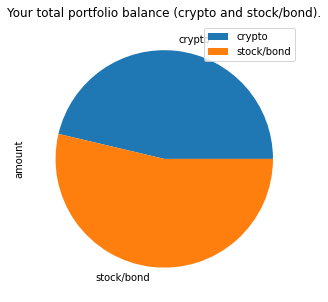

In [36]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', figsize=(5,5),title='Your total portfolio balance (crypto and stock/bond).')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [38]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3
display(emergency_fund_value)

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [43]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations! You have enough money in this fund!')
elif total_portfolio == emergency_fund_value:
    print('Congratulations! You have reached an important financial goal!')
else:
    print(f'There may be holes in your funds, you still need to save {emergency_fund_value - total_portfolio:.2f}.')



Congratulations! You have enough money in this fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [50]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp('2019-05-13', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-13', tz='America/New_York').isoformat()
 
# Set number of rows to 1000 to retrieve the maximum amount of rows
# YOUR CODE HERE

In [51]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
long_term_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

long_term_prices_df.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-05-13 04:00:00+00:00,108.83,108.9768,108.815,108.85,6733774,18575,108.884846,AGG
2019-05-14 04:00:00+00:00,108.90,108.9700,108.870,108.94,6217044,21837,108.919203,AGG
2019-05-15 04:00:00+00:00,109.16,109.1800,109.000,109.13,2667156,12362,109.089171,AGG
2019-05-16 04:00:00+00:00,109.04,109.0400,108.950,109.00,2756957,9263,108.993556,AGG
2019-05-17 04:00:00+00:00,109.12,109.1450,108.935,109.03,2092402,7452,109.023836,AGG
2019-05-20 04:00:00+00:00,108.98,109.0568,108.860,108.88,2035081,9880,108.929741,AGG
2019-05-21 04:00:00+00:00,108.86,108.9100,108.810,108.87,2029825,10303,108.866734,AGG
2019-05-22 04:00:00+00:00,108.92,109.0900,108.920,109.05,3509876,16272,109.052999,AGG
2019-05-23 04:00:00+00:00,109.18,109.5000,109.140,109.37,4922489,21453,109.375381,AGG


In [52]:
# Reorganize the DataFrame
# Separate ticker data
AGG_two = long_term_prices_df[long_term_prices_df['symbol']=='AGG'].drop('symbol',axis=1)
SPY_two = long_term_prices_df[long_term_prices_df['symbol']=='SPY'].drop('symbol', axis=1)

display(AGG_two,SPY_two)

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2019-05-13 04:00:00+00:00,108.83,108.9768,108.815,108.85,6733774,18575,108.884846
2019-05-14 04:00:00+00:00,108.90,108.9700,108.870,108.94,6217044,21837,108.919203
2019-05-15 04:00:00+00:00,109.16,109.1800,109.000,109.13,2667156,12362,109.089171
2019-05-16 04:00:00+00:00,109.04,109.0400,108.950,109.00,2756957,9263,108.993556
2019-05-17 04:00:00+00:00,109.12,109.1450,108.935,109.03,2092402,7452,109.023836
...,...,...,...,...,...,...,...
2022-05-09 04:00:00+00:00,101.54,102.1000,101.475,102.07,8548918,27200,101.812100
2022-05-10 04:00:00+00:00,102.50,102.7200,102.320,102.38,16565694,46588,102.531695
2022-05-11 04:00:00+00:00,102.07,102.7850,101.960,102.76,15079560,42508,102.530147


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2019-05-13 04:00:00+00:00,282.39,283.4900,279.9300,280.86,127837979,670187,281.560182
2019-05-14 04:00:00+00:00,282.01,285.1000,281.8500,283.40,77106090,390251,283.609239
2019-05-15 04:00:00+00:00,281.60,285.7700,281.3600,285.06,75152409,364823,284.276653
2019-05-16 04:00:00+00:00,285.83,289.2100,285.7600,287.70,77186068,352847,287.797144
2019-05-17 04:00:00+00:00,285.13,288.6000,285.1207,285.84,100853024,401172,286.609816
...,...,...,...,...,...,...,...
2020-04-20 04:00:00+00:00,282.60,286.7912,281.3500,281.59,100126051,600462,283.731398
2020-04-21 04:00:00+00:00,276.48,278.0400,272.0200,273.04,126387834,923555,274.755324
2020-04-22 04:00:00+00:00,278.38,281.0000,276.9100,279.10,93527425,527780,278.482531


In [56]:
# Concatenate the ticker DataFrames
long_term_prices_df = pd.concat([AGG_two,SPY_two], axis=1, keys=['AGG','SPY'])

# Display both the first and last five rows of the DataFrame
display(long_term_prices_df.head(),long_term_prices_df.tail(252))
# YOUR CODE HERE

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-05-13 04:00:00+00:00  108.83  108.9768  108.815  108.85  6733774   
2019-05-14 04:00:00+00:00  108.90  108.9700  108.870  108.94  6217044   
2019-05-15 04:00:00+00:00  109.16  109.1800  109.000  109.13  2667156   
2019-05-16 04:00:00+00:00  109.04  109.0400  108.950  109.00  2756957   
2019-05-17 04:00:00+00:00  109.12  109.1450  108.935  109.03  2092402   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2019-05-13 04:00:00+00:00       18575  108.884846  282.39  283.49  279.9300   
2019-05-14 04:00:00+00:00       21837  108.919203  282.01  285.10  281.8500   
2019-05-15 04:00:00+00:00       12362  109.089171  281.60  285.77  281.3600   
2019-05-16 04:00:00+00:00        9263  108.993556  285.83  289.21  285.7600   
2019-05-17 04:00:00+00:00        7452  109.023836  285.13  288.60  285.1207   

                                                                        
                            close       volume trade_count        vwap  
timestamp                                                               
2019-05-13 04:00:00+00:00  280.86  127837979.0    670187.0  281.560182  
2019-05-14 04:00:00+00:00  283.40   77106090.0    390251.0  283.609239  
2019-05-15 04:00:00+00:00  285.06   75152409.0    364823.0  284.276653  
2019-05-16 04:00:00+00:00  287.70   77186068.0    352847.0  287.797144  
2019-05-17 04:00:00+00:00  285.84  100853024.0    401172.0  286.609816

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2021-05-17 04:00:00+00:00  114.21  115.4999  111.260  114.20   4928201   
2021-05-18 04:00:00+00:00  114.11  114.1100  114.030  114.06   3674624   
2021-05-19 04:00:00+00:00  114.03  114.6200  113.790  113.90   6892443   
2021-05-20 04:00:00+00:00  114.08  114.3000  114.080  114.29   6243292   
2021-05-21 04:00:00+00:00  114.36  114.4000  114.230  114.34   3874459   
...                           ...       ...      ...     ...       ...   
2022-05-09 04:00:00+00:00  101.54  102.1000  101.475  102.07   8548918   
2022-05-10 04:00:00+00:00  102.50  102.7200  102.320  102.38  16565694   
2022-05-11 04:00:00+00:00  102.07  102.7850  101.960  102.76  15079560   
2022-05-12 04:00:00+00:00  102.94  103.1400  102.865  102.95   9011922   
2022-05-13 04:00:00+00:00  102.75  102.7800  102.480  102.51   6701432   

                                                   SPY                        \
                          trade_count        vwap open high low close volume   
timestamp                                                                      
2021-05-17 04:00:00+00:00       14402  114.197573  NaN  NaN NaN   NaN    NaN   
2021-05-18 04:00:00+00:00       15681  114.072618  NaN  NaN NaN   NaN    NaN   
2021-05-19 04:00:00+00:00       21080  113.973093  NaN  NaN NaN   NaN    NaN   
2021-05-20 04:00:00+00:00       18481  114.240783  NaN  NaN NaN   NaN    NaN   
2021-05-21 04:00:00+00:00       12593  114.294342  NaN  NaN NaN   NaN    NaN   
...                               ...         ...  ...  ...  ..   ...    ...   
2022-05-09 04:00:00+00:00       27200  101.812100  NaN  NaN NaN   NaN    NaN   
2022-05-10 04:00:00+00:00       46588  102.531695  NaN  NaN NaN   NaN    NaN   
2022-05-11 04:00:00+00:00       42508  102.530147  NaN  NaN NaN   NaN    NaN   
2022-05-12 04:00:00+00:00       29535  103.014617  NaN  NaN NaN   NaN    NaN   
2022-05-13 04:00:00+00:00       26730  102.590449  NaN  NaN NaN   NaN    NaN   

                                            
                          trade_count vwap  
timestamp                                   
2021-05-17 04:00:00+00:00         NaN  NaN  
2021-05-18 04:00:00+00:00         NaN  NaN  
2021-05-19 04:00:00+00:00         NaN  NaN  
2021-05-20 04:00:00+00:00         NaN  NaN  
2021-05-21 04:00:00+00:00         NaN  NaN  
...                               ...  ...  
2022-05-09 04:00:00+00:00         NaN  NaN  
2022-05-10 04:00:00+00:00         NaN  NaN  
2022-05-11 04:00:00+00:00         NaN  NaN  
2022-05-12 04:00:00+00:00         NaN  NaN  
2022-05-13 04:00:00+00:00         NaN  NaN  

[252 rows x 14 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [ ]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = # YOUR CODE HERE
ci_upper_thirty_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?